In [1]:
# import altair as alt;
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
import glob
import numpy as np
%matplotlib inline

/Users/federico.adolfi/miniconda3/envs/o_factor_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/federico.adolfi/miniconda3/envs/o_factor_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# %qtconsole

In [2]:
# Read all csv and concatenate
path = r'data/'
allFiles = glob.glob(path + "/*0.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=0, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [3]:
frame.head()

,PMCID,Journal Title,Year,data_shared,code_relevant,preprint,data_upon_request,code_shared,code_upon_request,preregistration,OSF_exploratory
0,PMC5756473,Nature,2017,1,1,0,0,0,0,0,0
1,PMC5756474,Nature,2017,1,0,0,0,0,0,0,0
2,PMC5756477,Curr Neurol Neurosci Rep,2017,0,0,0,0,0,0,0,0
3,PMC5756524,Psychol Trauma,2017,0,0,0,0,0,0,0,0
4,PMC5756535,J Biomech,2016,0,1,0,0,0,0,0,0


In [22]:
frame['Journal Title'].unique()

array(['Nature', 'Curr Neurol Neurosci Rep', 'Psychol Trauma', ...,
       'World J Biol Chem', 'Neurodiagn J', 'J Neurodegener Dis'],
      dtype=object)

In [36]:
frame[frame['Journal Title'] == 'Front Psychol']['Journal Title'].value_counts()

Front Psychol    4350
Name: Journal Title, dtype: int64

In [4]:
frame.duplicated(subset='PMCID', keep=False).any()

False

In [5]:
frame.count()

PMCID                309368
Journal Title        309368
Year                 309368
data_shared          309368
code_relevant        309368
preprint             309368
data_upon_request    309368
code_shared          309368
code_upon_request    309368
preregistration      309368
OSF_exploratory      309368
dtype: int64

Number of papers by year

In [19]:
frame[frame['Journal Title'] == 'Nat Commun'].groupby(['Year']).count()['PMCID']

Year
2010      53
2011      13
2012      73
2013     625
2014     303
2015     704
2016    1635
2017     209
2018    2753
Name: PMCID, dtype: int64

In [7]:
%%capture
frame[frame['data_upon_request'] == 1]['data_shared'] = 0
frame[frame['code_upon_request'] == 1]['code_shared'] = 0

From 2013 onwards

In [8]:
min_year = 2013
df_keep = pd.DataFrame(frame[frame['Year'] >= min_year])
df_keep.count()

PMCID                231107
Journal Title        231107
Year                 231107
data_shared          231107
code_relevant        231107
preprint             231107
data_upon_request    231107
code_shared          231107
code_upon_request    231107
preregistration      231107
OSF_exploratory      231107
dtype: int64

Keep only journals with more than 200 papers

In [9]:
min_papers = 200
a = df_keep.groupby(['Journal Title']).count() > min_papers
idx = a[a['Year'] == True].index
df = pd.DataFrame(df_keep.loc[df_keep['Journal Title'].isin(idx)])
df.count()

PMCID                195901
Journal Title        195901
Year                 195901
data_shared          195901
code_relevant        195901
preprint             195901
data_upon_request    195901
code_shared          195901
code_upon_request    195901
preregistration      195901
OSF_exploratory      195901
dtype: int64

In [10]:
df.groupby('Year').mean()

,data_shared,code_relevant,preprint,data_upon_request,code_shared,code_upon_request,preregistration,OSF_exploratory
Year,,,,,,,,
2013,0.131635,0.145677,0.038051,0.001023,0.036058,0.000194,0.000123,0.000000
2014,0.127746,0.149596,0.042709,0.001182,0.039315,0.000534,0.000153,0.000114
2015,0.151337,0.177849,0.040872,0.004477,0.059767,0.000581,0.000116,0.000988
2016,0.164951,0.183649,0.050646,0.007804,0.064656,0.000576,0.000367,0.002593
2017,0.153955,0.217278,0.065934,0.003046,0.106082,0.000653,0.000762,0.004134
2018,0.170763,0.221371,0.082128,0.004234,0.094687,0.000744,0.001053,0.008056


Proportion of articles open sciencing 

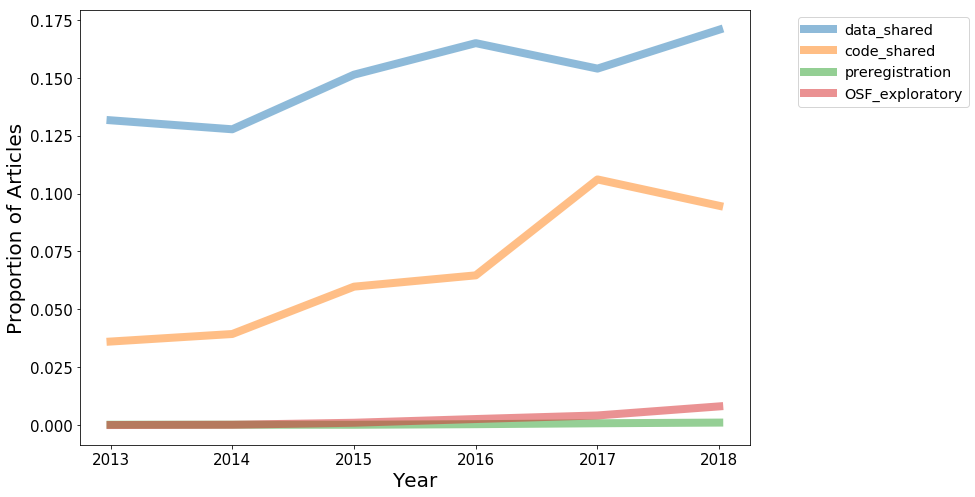

In [11]:
ax = df.groupby('Year').mean()\
    .drop(['code_relevant', 'preprint', 
           'code_upon_request', 'data_upon_request'], axis=1)\
    .plot(figsize=(12, 8), fontsize=15, linewidth=8, alpha=0.5);

ax.legend(fontsize="x-large", loc=9, bbox_to_anchor=(1.2, 1));
plt.xlabel('Year', fontsize=20);
plt.ylabel('Proportion of Articles', fontsize=20);

Select top 4 journals with more than 3k papers

In [37]:
min_papers = 4000
a = df.groupby(['Journal Title']).count() > min_papers
idx = a[a['Year'] == True].index
df_top = pd.DataFrame(df.loc[df['Journal Title'].isin(idx)])
df_top.count()

PMCID                116567
Journal Title        116567
Year                 116567
data_shared          116567
code_relevant        116567
preprint             116567
data_upon_request    116567
code_shared          116567
code_upon_request    116567
preregistration      116567
OSF_exploratory      116567
dtype: int64

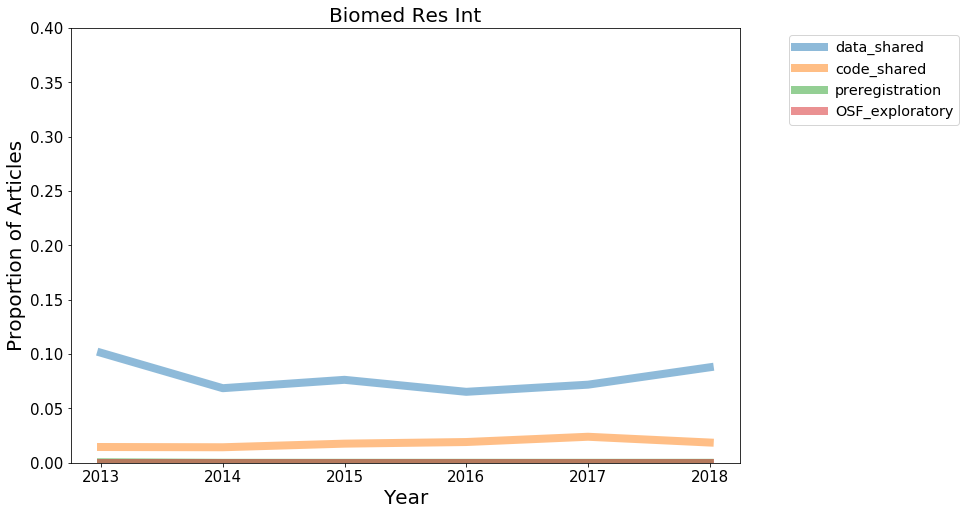

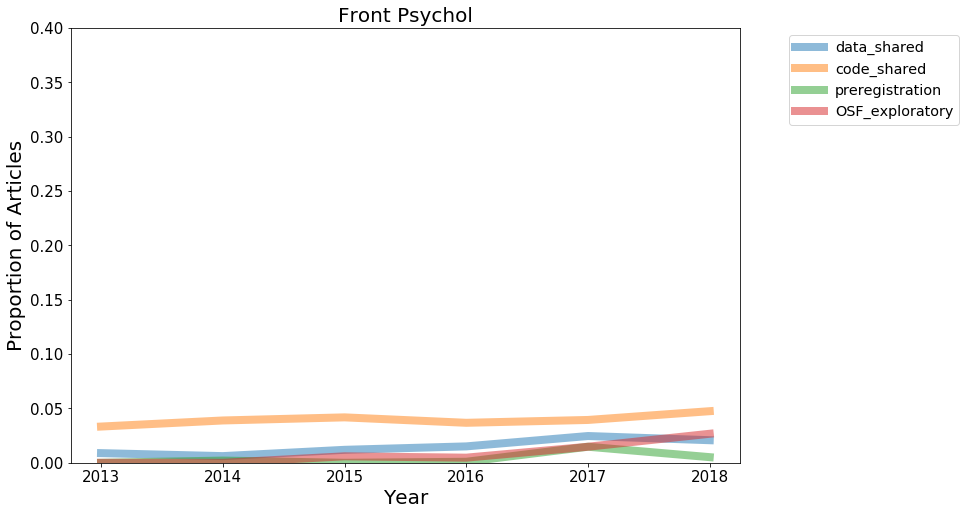

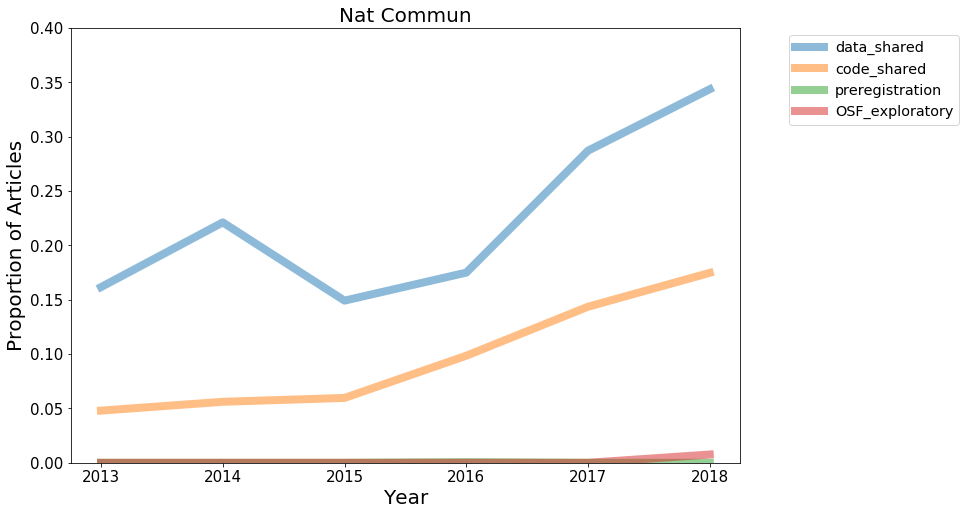

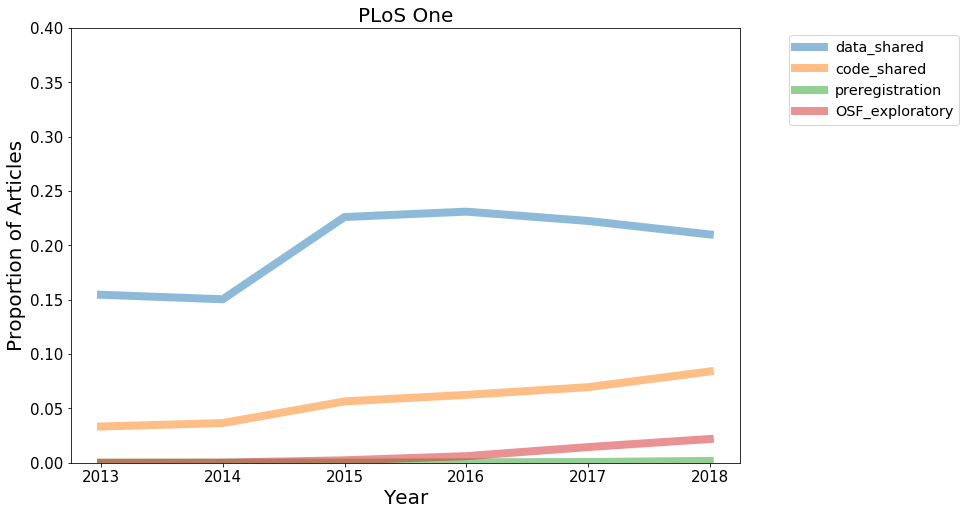

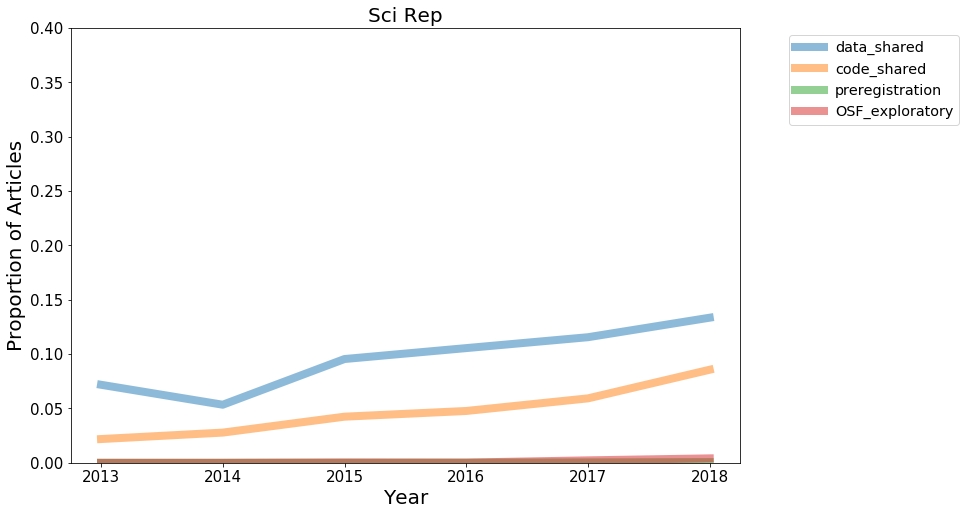

In [38]:
for j in idx:
    d = df_top[df_top['Journal Title'] == j]\
    .drop(['code_relevant', 'preprint', 
           'code_upon_request', 'data_upon_request'], axis=1)
    
    ax = d.groupby('Year').mean()\
    .plot(figsize=(12, 8), fontsize=15, linewidth=8, alpha=0.5);

    ax.legend(fontsize="x-large", loc=9, bbox_to_anchor=(1.2, 1));
    plt.xlabel('Year', fontsize=20);
    plt.ylabel('Proportion of Articles', fontsize=20);
    plt.title(j, fontsize=20);
    plt.ylim(0, .4)